In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
import math
from tensorflow.keras.utils import to_categorical

In [2]:
(X_dev, y_dev), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
X_train, X_val, y_train, y_val = train_test_split(X_dev,y_dev, test_size=0.2)

In [4]:
np.asarray(tf.image.resize(np.expand_dims(X_dev[2],-1), [10,10])[:,:,0]).astype(int)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  65,   0,   0,   0,   0,   0, 165,   0,   0],
       [  0, 164,   0,   0,   0,   0,   0, 179,   0,   0],
       [  0, 225,   0,   0,   0,   1, 125, 108,   0,   0],
       [  0, 222, 186, 232, 226, 110, 170,   2,   0,   0],
       [  0,   0,   0,   0,   0,   0, 228,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 228,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 222,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

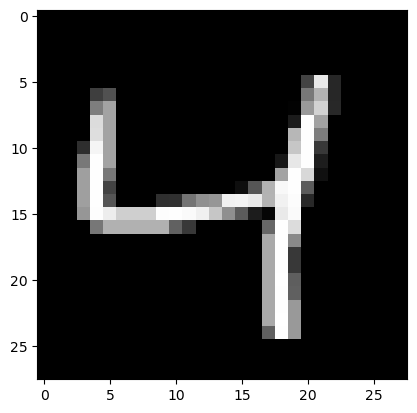

In [5]:
plt.imshow(X_dev[2], cmap="gray")
plt.savefig("mnist_4.png")

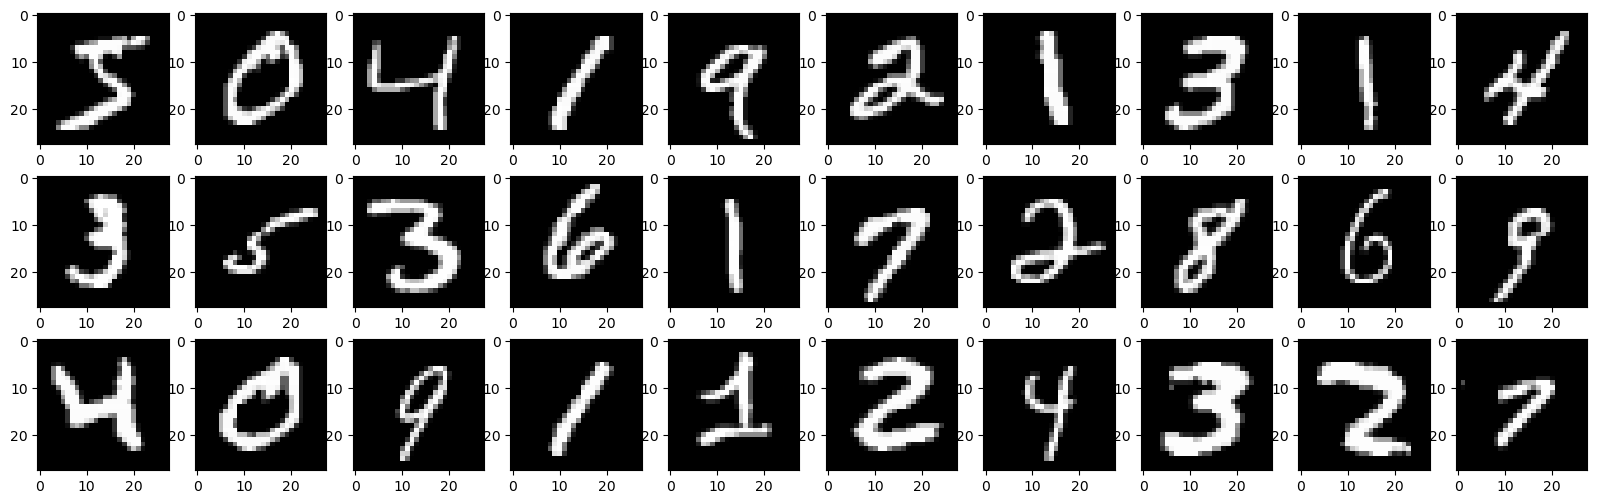

In [6]:
plt.figure(figsize=(20,6))
for i in range(30):
    plt.subplot(3,10,i+1)
    plt.imshow(X_dev[i], cmap="gray")
plt.savefig("mnist_multiple.png",dpi=100)

In [7]:
X_train = tf.image.grayscale_to_rgb(tf.convert_to_tensor(np.expand_dims(X_train,-1)))
X_val = tf.image.grayscale_to_rgb(tf.convert_to_tensor(np.expand_dims(X_val,-1)))
X_test = tf.image.grayscale_to_rgb(tf.convert_to_tensor(np.expand_dims(X_test,-1)))

In [8]:
X_train = tf.image.resize(X_train, [32,32])
X_val = tf.image.resize(X_val, [32,32])
X_test = tf.image.resize(X_test, [32,32])

#### LeNet:

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(6, 5, activation='tanh', input_shape=X_train.shape[1:]))
model.add(tf.keras.layers.AveragePooling2D(2))
model.add(tf.keras.layers.Activation('sigmoid'))
model.add(tf.keras.layers.Conv2D(16, 5, activation='tanh'))
model.add(tf.keras.layers.AveragePooling2D(2))
model.add(tf.keras.layers.Activation('sigmoid'))
model.add(tf.keras.layers.Conv2D(120, 5, activation='tanh'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(84, activation='tanh'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 activation (Activation)     (None, 14, 14, 6)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 activation_1 (Activation)   (None, 5, 5, 16)          0

In [10]:
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(6, 5, activation='relu', input_shape=(X_train.shape[1:])))
model.add(tf.keras.layers.AveragePooling2D(2))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(16, 5, activation='relu'))
model.add(tf.keras.layers.AveragePooling2D(2))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(120, 5, activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(84, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 activation_2 (Activation)   (None, 14, 14, 6)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 activation_3 (Activation)   (None, 5, 5, 16)         

In [12]:
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.AUC(curve='ROC')])

In [13]:
history = model.fit(x=X_train,y=y_train, epochs=15, batch_size=64, validation_data=(X_val,y_val), shuffle=True
                   )

Epoch 1/15
750/750 [==============================] - 12s 15ms/step - loss: 0.2649 - categorical_accuracy: 0.9330 - auc: 0.9934 - val_loss: 0.0922 - val_categorical_accuracy: 0.9722 - val_auc: 0.9981
Epoch 2/15
750/750 [==============================] - 11s 14ms/step - loss: 0.0689 - categorical_accuracy: 0.9790 - auc: 0.9988 - val_loss: 0.0654 - val_categorical_accuracy: 0.9800 - val_auc: 0.9986
Epoch 3/15
750/750 [==============================] - 11s 15ms/step - loss: 0.0510 - categorical_accuracy: 0.9843 - auc: 0.9992 - val_loss: 0.0663 - val_categorical_accuracy: 0.9796 - val_auc: 0.9984
Epoch 4/15
750/750 [==============================] - 12s 16ms/step - loss: 0.0420 - categorical_accuracy: 0.9865 - auc: 0.9994 - val_loss: 0.0598 - val_categorical_accuracy: 0.9835 - val_auc: 0.9986
Epoch 5/15
750/750 [==============================] - 12s 16ms/step - loss: 0.0344 - categorical_accuracy: 0.9894 - auc: 0.9994 - val_loss: 0.0502 - val_categorical_accuracy: 0.9868 - val_auc: 0.9987


In [14]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0524 - categorical_accuracy: 0.9879 - auc: 0.9984


[0.05243873968720436, 0.9879000186920166, 0.9983799457550049]

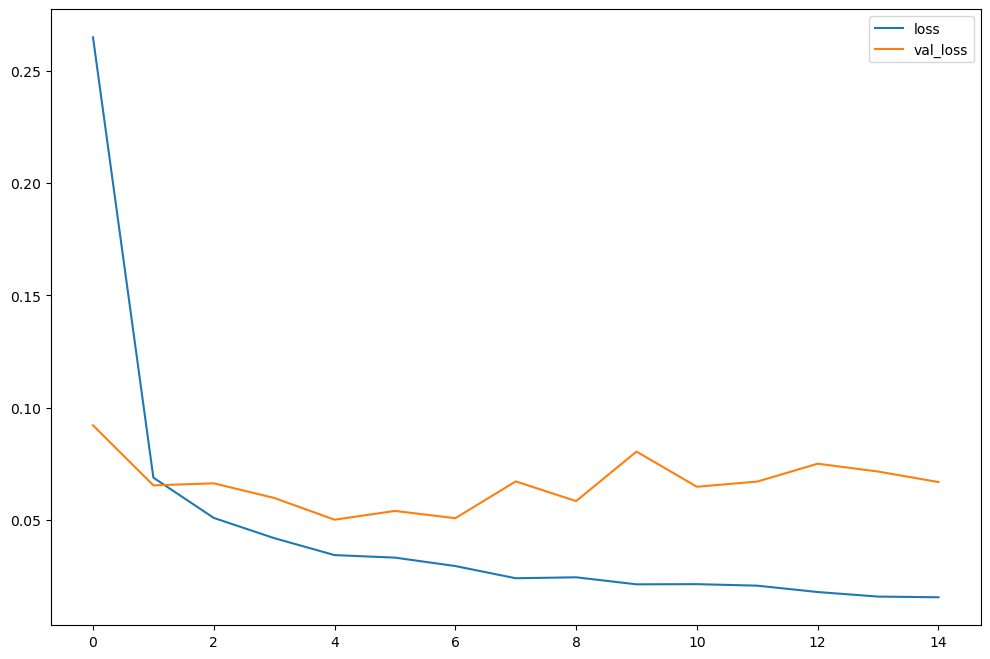

In [15]:
plt.figure(figsize=(12,8))
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

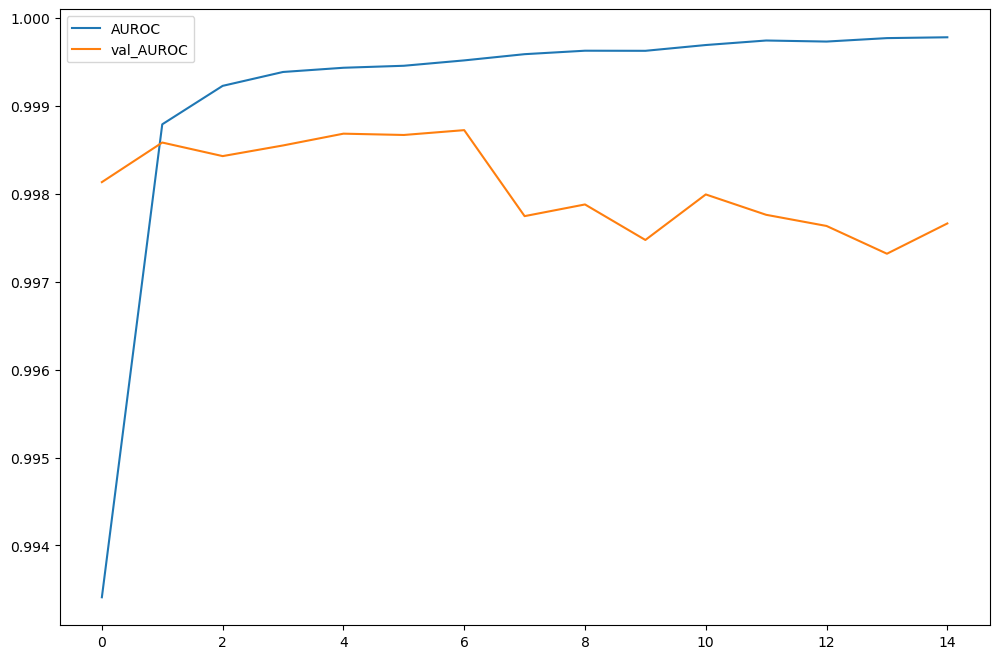

In [16]:
plt.figure(figsize=(12,8))
plt.plot(history.history[list(history.history.keys())[2]], label="AUROC")
plt.plot(history.history[list(history.history.keys())[5]], label="val_AUROC")
plt.legend()

In [17]:
import shap

In [19]:
X_train = np.asarray(X_train)

In [20]:
X_test = np.asarray(X_test)

In [21]:
# ...include code from https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

# select a set of background examples to take an expectation over
background = X_train[np.random.choice(X_train.shape[0], 1000, replace=False)]

# explain predictions of the model on three images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(X_test[1:4])


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


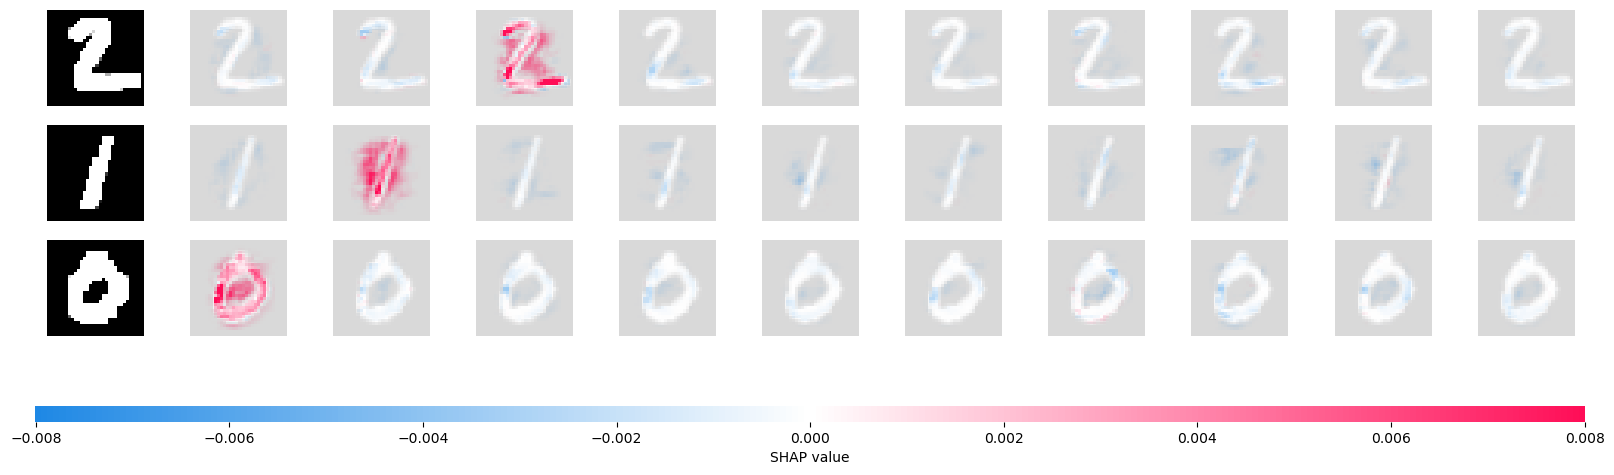

In [22]:
shap.image_plot(shap_values, X_test[1:4])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


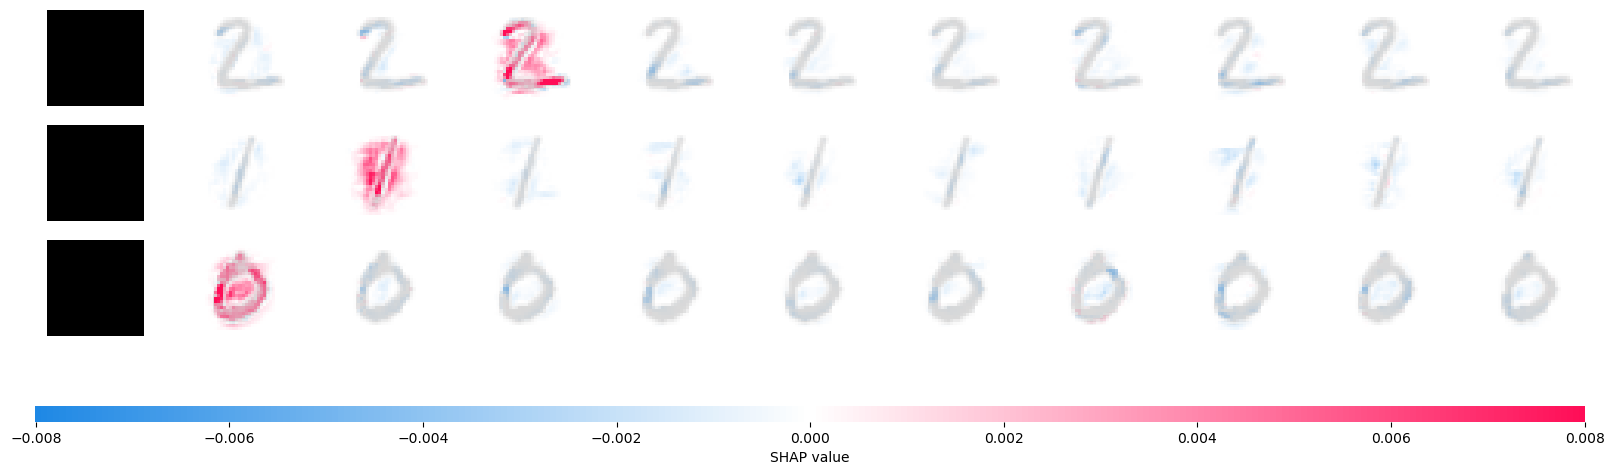

In [23]:
shap.image_plot(shap_values, -X_test[1:4])